#ALY6040 Assignment - Module 1 EDA
* EDA of Netflix Dataset
* Instructor: Professor Justin Grosz

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_csv('/content/Netflix_Modeling.csv')
data.head()

,User ID,Date,Day,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day
0,62565,2/9/2019,Saturday,Stranger Things,2.0,10.0,59.0,Female,1.0,1.0
1,108824,2/9/2019,Saturday,Stranger Things,1.0,4.0,40.0,Female,0.0,1.0
2,118833,2/9/2019,Saturday,Stranger Things,2.0,8.0,51.0,Male,1.0,1.0
3,97717,2/9/2019,Saturday,Stranger Things,2.0,6.0,10.0,Male,0.0,0.0
4,35588,2/9/2019,Saturday,Stranger Things,2.0,10.0,40.0,Female,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       3004 non-null   int64  
 1   Date          3004 non-null   object 
 2   Day           3004 non-null   object 
 3   Show          3004 non-null   object 
 4   Season        2969 non-null   float64
 5   Episode       2986 non-null   float64
 6   Time Watched  2987 non-null   float64
 7   Gender        2905 non-null   object 
 8   Completed     2957 non-null   float64
 9   Time of Day   2904 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 234.8+ KB


In [ ]:
data.isnull().sum()

User ID           0
Date              0
Day               0
Show              0
Season           35
Episode          18
Time Watched     17
Gender           99
Completed        47
Time of Day     100
dtype: int64

In [ ]:
missing_percent = data.isnull().sum() * 100 /len(data)
print(missing_percent)

User ID         0.000000
Date            0.000000
Day             0.000000
Show            0.000000
Season          1.165113
Episode         0.599201
Time Watched    0.565912
Gender          3.295606
Completed       1.564581
Time of Day     3.328895
dtype: float64


In [ ]:
# Convert 'Date' to DateTime
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# correcting data types
data['Day'] = data['Date'].astype('category')
data['Show'] = data['Show'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Season'] = data['Season'].astype('category')
data['Episode'] = data['Episode'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Completed'] = data['Completed'].astype('bool')
data['Time of Day'] = data['Time of Day'].astype('bool')

In [ ]:
data.describe(include = ['object','category'])

,Day,Show,Season,Episode,Gender
count,3004,3004,2969.0,2986.0,2905
unique,4,5,10.0,10.0,2
top,2019-02-12 00:00:00,Stranger Things,2.0,8.0,Male
freq,780,969,887.0,329.0,1466


In [ ]:
# dropping column which is not required
data.drop('User ID', axis = 1,inplace= True)

# Data Preprocessing

In [ ]:
# Columns to be cleaned: Season, Episode, Time Watched, Gender, Completed, Time of Day
df = data.copy()

# dropping Missing Values in 'Gender'
df.dropna(subset=['Gender'], inplace= True)

In [ ]:
# Filling missing values with KNN for 'Season', 'Episode', 'Time Watched', 'Completed', 'Time of Day'
imputer = KNNImputer(n_neighbors= 5)

columns_for_imputation = ['Season', 'Episode', 'Time Watched', 'Completed', 'Time of Day']
imputed_data = imputer.fit_transform(df[columns_for_imputation])
df[columns_for_imputation] = imputed_data

In [ ]:
# Changing datatype to int
num_columns = ['Season','Episode','Completed','Time of Day']
for column in num_columns:
  df[column] = df[column].round().astype(int)

# Finding Outliers

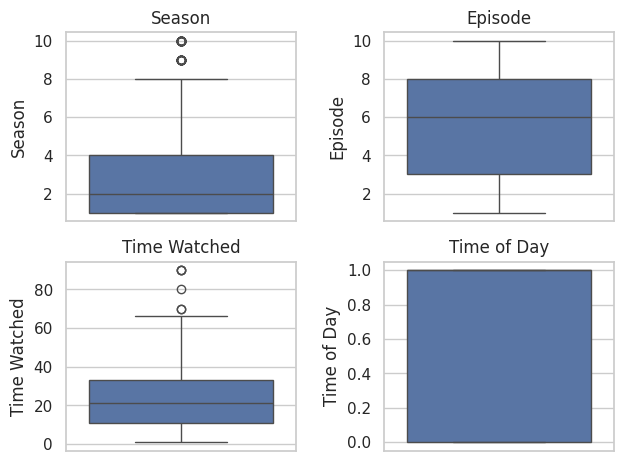

In [ ]:
numerical_columns = ['Season', 'Episode', 'Time Watched', 'Time of Day']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

#Univariate analysis

<Axes: title={'center': 'Compeleted ratio in dataset'}>

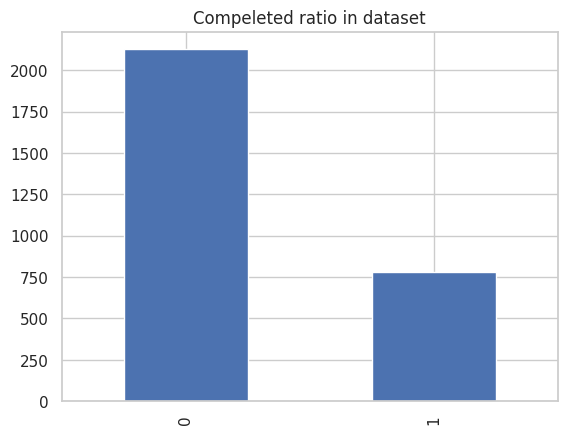

In [ ]:
plt.title('Compeleted ratio in dataset')
df.Completed.value_counts().plot(kind='bar')

<Axes: >

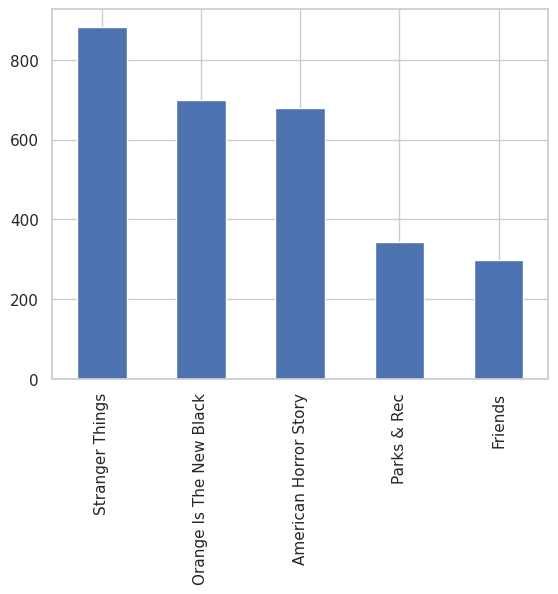

In [ ]:
df.Show.value_counts().plot(kind= 'bar')

<Axes: >

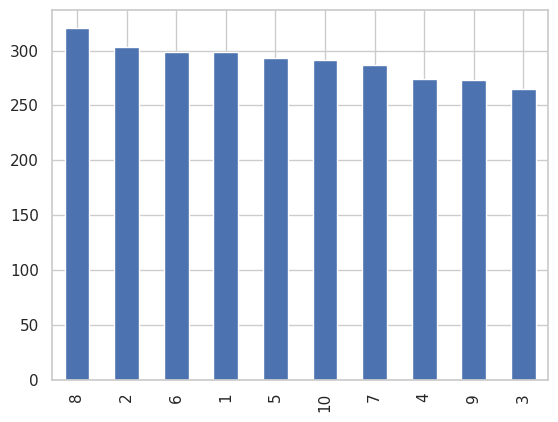

In [ ]:
df.Episode.value_counts().plot(kind='bar')

<Axes: >

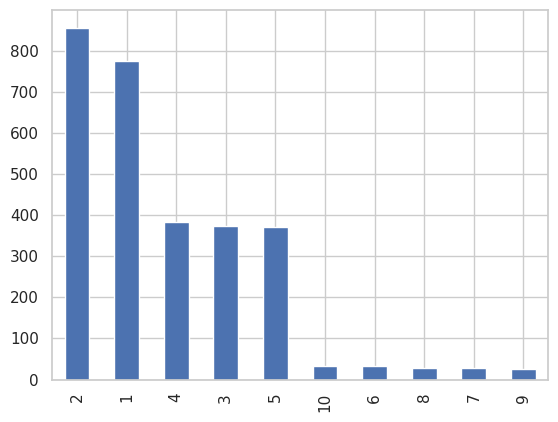

In [ ]:
df.Season.value_counts().plot(kind='bar')

<Axes: >

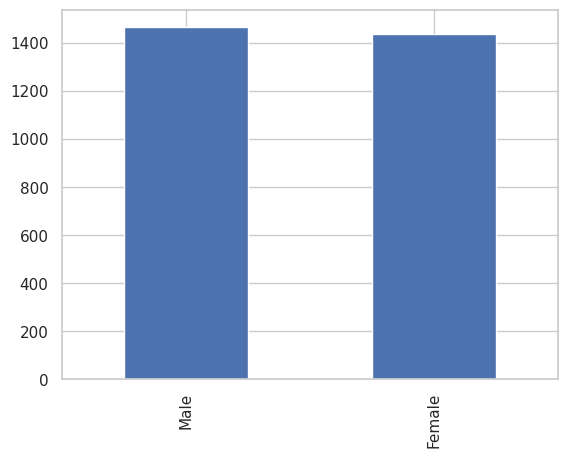

In [ ]:
df.Gender.value_counts().plot(kind='bar')

#Bivariate analysis

<Axes: xlabel='Time Watched', ylabel='Completed'>

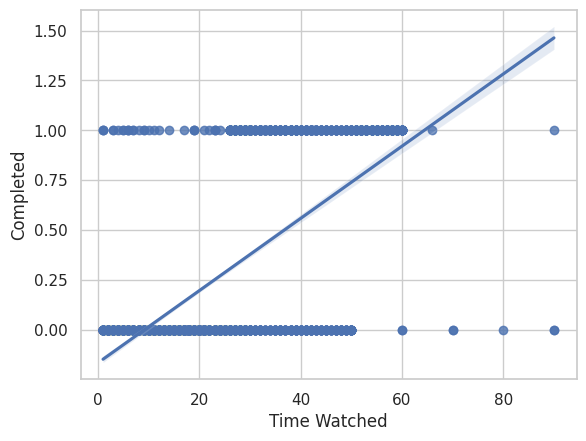

In [ ]:
sns.regplot(x= 'Time Watched', y='Completed', data=df)

<Axes: xlabel='Episode', ylabel='Completed'>

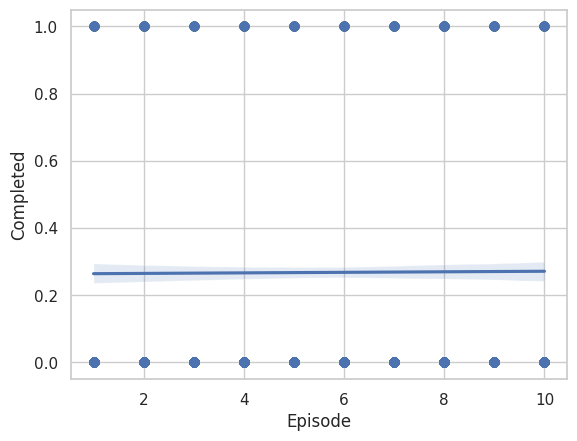

In [ ]:
sns.regplot(x= 'Episode', y='Completed', data=df)

In [ ]:
# Completion rates for each show
completion_rates = df.groupby('Show')['Completed'].mean().reset_index()

# Sorting the shows by completion rate for better visualization
completion_rates = completion_rates.sort_values('Completed', ascending=False)

<ipython-input-83-5374a2792541>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Completed', y='Show', data=completion_rates, palette='coolwarm')


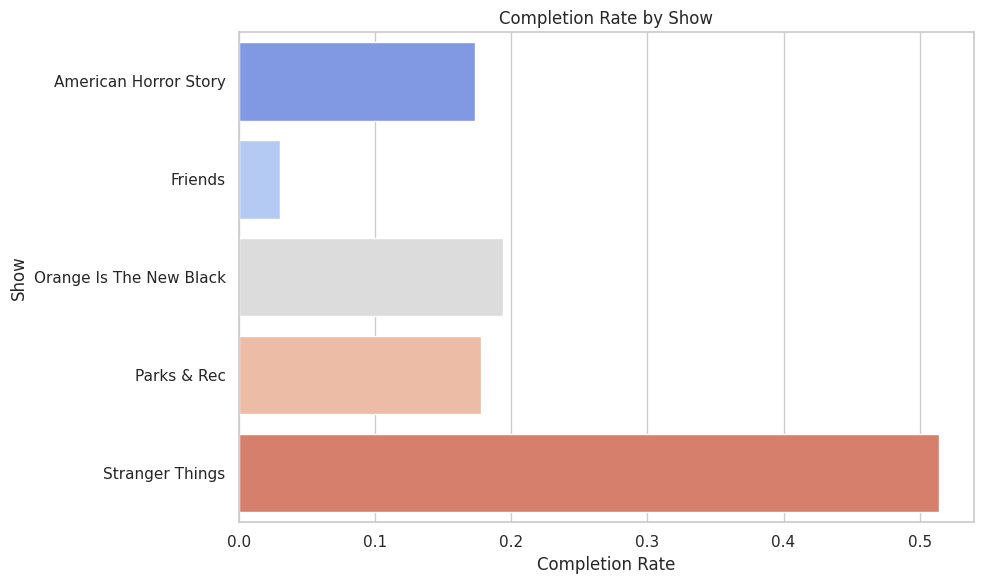

In [ ]:
# Visualize the completion rates by show using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Completed', y='Show', data=completion_rates, palette='coolwarm')
plt.title('Completion Rate by Show')
plt.xlabel('Completion Rate')
plt.ylabel('Show')

plt.tight_layout()

In [ ]:
avg_time_watched_by_show = df.groupby('Show')['Time Watched'].mean().reset_index()

Text(0, 0.5, 'Show')

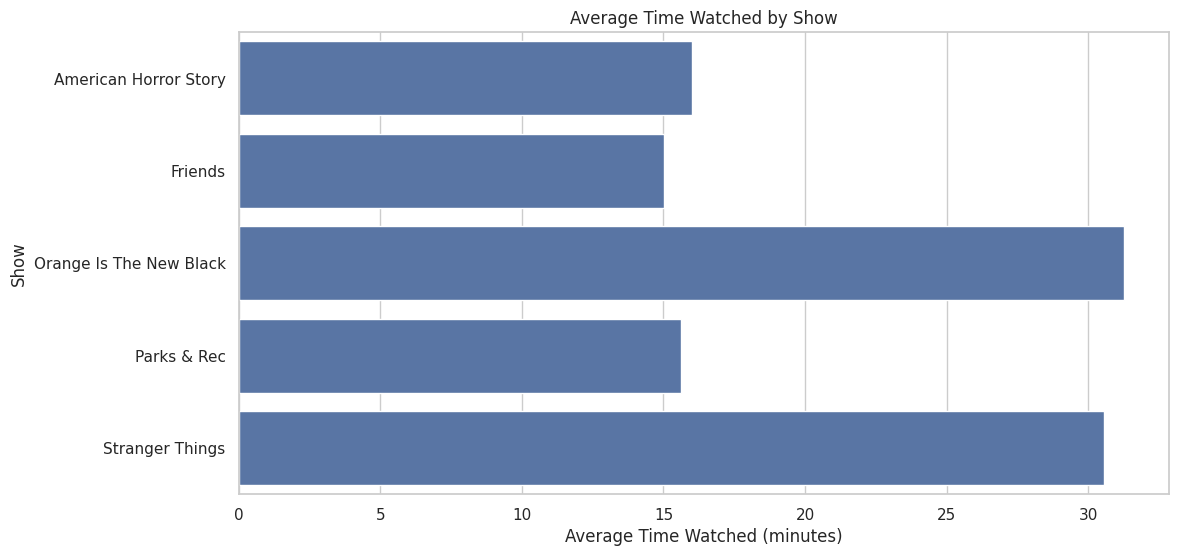

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Show', x='Time Watched', data=avg_time_watched_by_show)
plt.title('Average Time Watched by Show')
plt.xlabel('Average Time Watched (minutes)')
plt.ylabel('Show')

In [ ]:
completion_rate_by_show_season = df.groupby(['Show', 'Season'])['Completed'].mean().reset_index()

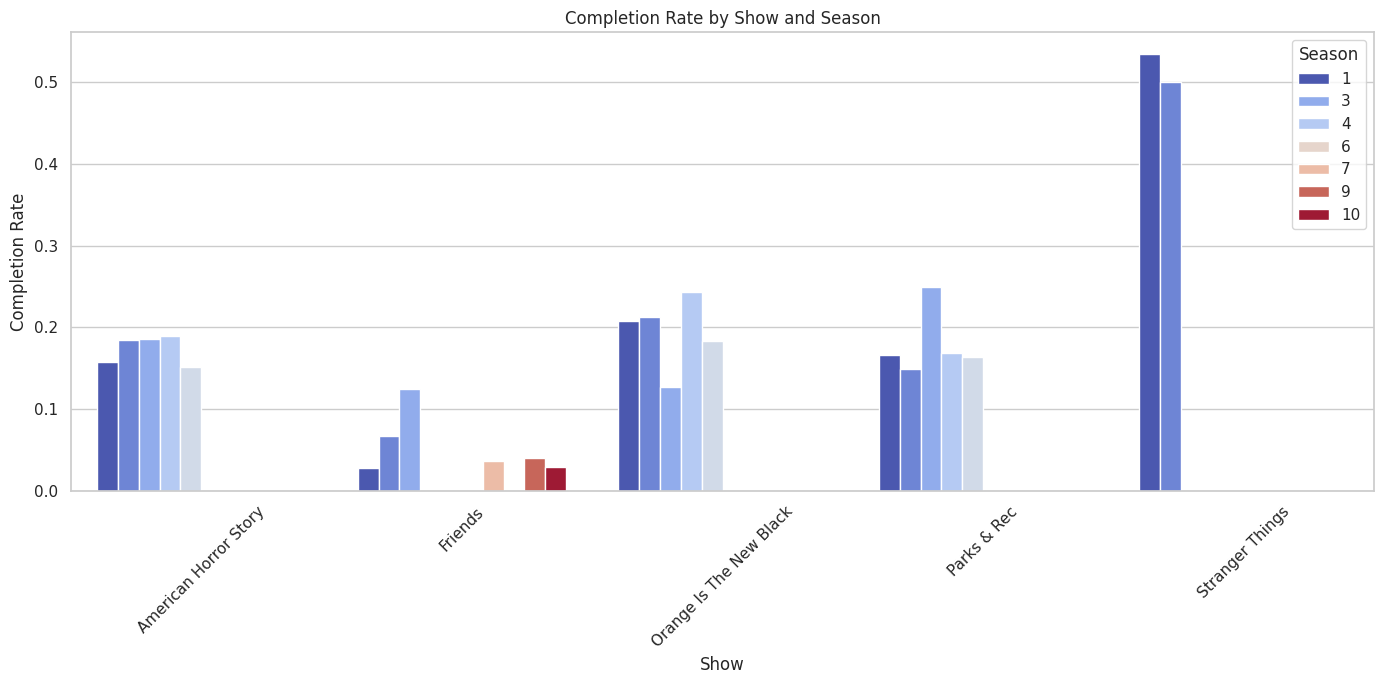

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Show', y='Completed', hue='Season', data=completion_rate_by_show_season, palette='coolwarm')
plt.title('Completion Rate by Show and Season')
plt.xlabel('Show')
plt.ylabel('Completion Rate')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

#Encoding categorical column

In [ ]:
label_encoder = LabelEncoder()
encode_col = ['Day','Show','Gender']
for column in encode_col:
  df[column] = label_encoder.fit_transform(df[column])

<ipython-input-89-dc55d46b6e58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


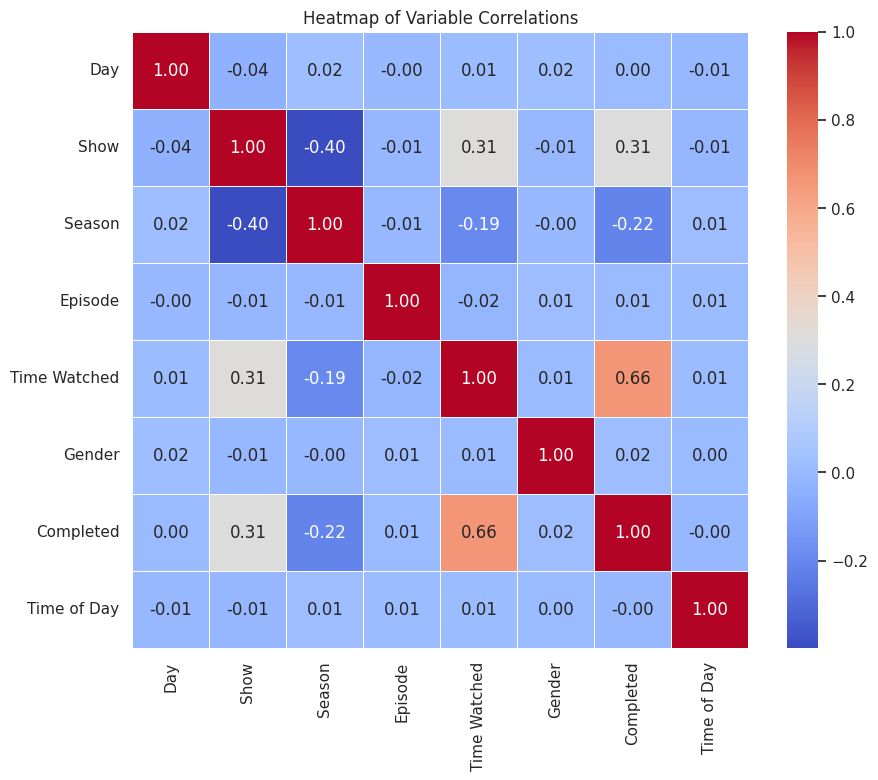

In [ ]:
correlation_matrix = df.corr()
sns.set(context='notebook', style='whitegrid')

# Create the heatmap
plt.figure(figsize=(10, 8))  # Optionally adjust the size of the plot
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

# Add titles and labels as needed
plt.title('Heatmap of Variable Correlations')
plt.show()